In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb
import sys, gc
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from multiprocessing import Process
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from xgboost import plot_importance
sys.path.append(r"/home/lxj/sgs_program/nbs/")#/devdata5/sgs_mlai_dev/nbs/sgs_newmodel_ver1/xieyi21265
from public_file.global_define_online import target_action_space,base_card_space,target_seat_list
from public_file.global_func_online import data_from_mysql, reduce_mem_usage
print(xgb.__version__)

1.6.2


In [ ]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.width', 10000)
pd.set_option('display.max_columns', None)

In [ ]:
model_save_name = '/home/lxj/21214new_model/base/base_21214_.model'

In [ ]:
sgs_data = pd.read_feather('/home/lxj/21214new_model/base/base_21214_10000_.feather')
# sgs_data['action_idx'].value_counts()


In [ ]:
sgs_data


,ailive,emery_alive_num,own_alive_number,emery_can_change,team_can_change,phase_id,curseat,curheroid,curherosex,curherospell1,curherospell2,curherospell3,curheromaxhp,curherohp,curcardnum,curnum_sha,curnum_huosha,curnum_leisha,curnum_shan,curnum_tao,curnum_ssqy,curnum_ghcq,curnum_wgfd,curnum_wzsy,curnum_juedou,curnum_mmlq,curnum_wjqf,curnum_flash,curnum_tyjy,curnum_wxkj,curnum_jdsr,curnum_lbss,curnum_bgz,curnum_chitu,curnum_zixin,curnum_dawam,curnum_jueying,curnum_dilu,curnum_zhft,curnum_zglv,curnum_cxsgj,curnum_qgj,curnum_qlyyd,curnum_zbsm,curnum_gsf,curnum_fthj,curnum_qlg,curnum_jiu,curnum_huogong,curnum_blcd,curnum_tslh,curnum_gdd,curnum_zqys,curnum_tengjia,curnum_byss,curnum_hualiu,curnum_rwd,curnum_hbj,curnum_388,curnum_390,curnum_391,curnum_700,curnum_1128,curnum_1129,curnum_1131,curnum_1135,curnum_2055,curnum_3060,curnum_3061,curnum_3063,curnum_6008,curnum_6009,curnum_6010,curcolor1,curcolor2,curcolor3,curcolor4,curarms_spell,curequis_spell,curadd1_spell,curreduce1_spell,curextar_spell,curstate_jiu,curstate_flash,curstate_tslh,have_use_sha,cur_can_sha,need_give_up,taojiu_num,friseat,friheroid,friherosex,friherospell1,friherospell2,friherospell3,friheromaxhp,friherohp,fricardnum,frinum_total_sha,frinum_shan,frinum_tao,frinum_wxkj,frinum_jiu,friarms_spell,friequis_spell,friadd1_spell,frireduce1_spell,friextar_spell,frijudge_lbss,frijudge_blcd,frijudge_flash,fristate_tslh,fri_inrange_attr,fri_inrange_jn,fri_have_handcards,nextheroid,nextherosex,nextherospell1,nextherospell2,nextherospell3,nextheromaxhp,nextherohp,nextcardnum,nextarms_spell,nextequis_spell,nextadd1_spell,nextreduce1_spell,nextextar_spell,nextjudge_lbss,nextjudge_blcd,nextjudge_flash,nextstate_tslh,next_inrange_attr,next_inrange_jn,next_have_handcards,next_opposite_sex,next_be_lbss,next_be_blcd,next_be_ssqy,next_be_ghcq,next_be_sha,next_be_juedou,next_attr_no_equis_distance,otherheroid,otherherosex,otherherospell1,otherherospell2,otherherospell3,otherheromaxhp,otherherohp,othercardnum,otherarms_spell,otherequis_spell,otheradd1_spell,otherreduce1_spell,otherextar_spell,otherjudge_lbss,otherjudge_blcd,otherjudge_flash,otherstate_tslh,other_inrange_attr,other_inrange_jn,other_have_handcards,other_opposite_sex,other_be_lbss,other_be_blcd,other_be_ssqy,other_be_ghcq,other_be_sha,other_be_juedou,other_attr_no_equis_distance,can_jdsr,action_idx,error,kf
0,4,2,2,0,0,4,0,18,1,44,0,0,4,4,7,3,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,2,87,0,0,19,0,0,0,1,0,1,1,1,1,20,1,51,52,0,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,8,1,53,0,0,4,3,0,23,88,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,24,2,67,68,0,3,3,4,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,14,0,/devdata1/mvpsimulator/32/1/SimulatorInfo_21214_119_1_485115767555874816.json
1,3,1,2,0,0,4,0,18,1,44,0,0,4,4,5,1,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,1,87,0,0,19,0,0,0,1,0,1,1,1,1,20,1,51,52,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,2,67,68,0,3,3,3,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,14,0,/devdata1/mvpsimulator/32/1/SimulatorInfo_21214_225_1_485115767555874816.json
2,3,1,2,0,0,4,0,18,1,44,0,0,4,4,6,0,0,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,87,0,0,19,0,0,0,1,0,1,1,1,1,20,1,51,52,0,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,2,67,68,0,3,3,4,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,38,0,/devdata1/mvpsimulator/32/1/SimulatorInfo_21214_282_1_485115767555874816.json
3,2,1,1,0,0,4,0,18,1,44,0,0,4,4,4,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,25,0,21,19,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,2,67,68,0,3,1,2,28,0,0,0,0,

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc='progress_apply')
#
def make_feather(x):
    enemy_be_lbss = 0
    if x['next_be_lbss'] == 1 or x['other_be_lbss'] == 1:
        enemy_be_lbss = 1
    enemy_be_blcd = 0
    if x['next_be_blcd'] == 1 or x['other_be_blcd'] == 1:
        enemy_be_blcd = 1
    enemy_be_ssqy = 0
    if x['next_be_ssqy'] == 1 or x['other_be_ssqy'] == 1:
        enemy_be_ssqy = 1
    enemy_be_ghcq = 0
    if x['next_be_ghcq'] == 1 or x['other_be_ghcq'] == 1:
        enemy_be_ghcq = 1
    enemy_be_sha = 0
    if x['next_be_sha'] == 1 or x['other_be_sha'] == 1:
        enemy_be_sha = 1
    enemy_be_juedou = 0
    if x['next_be_juedou'] == 1 or x['other_be_juedou'] == 1:
        enemy_be_juedou = 1
    return [enemy_be_lbss,enemy_be_blcd,enemy_be_ssqy,enemy_be_ghcq,enemy_be_sha,enemy_be_juedou]
sgs_data[['enemy_be_lbss','enemy_be_blcd','enemy_be_ssqy','enemy_be_ghcq','enemy_be_sha','enemy_be_juedou']] =sgs_data.progress_apply(make_feather,axis = 1,result_type = 'expand')

progress_apply: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 398011/398011 [00:38<00:00, 10315.44it/s]


In [ ]:
def make_data(x):
    return [0,0,0,0]

sgs_data[['curheroid','curherospell1', 'curherospell2', 'curherospell3']] = sgs_data.progress_apply(make_data,axis = 1,result_type = 'expand')
# sgs_data = pd.concat([sgs_data,aa])
# sgs_data

progress_apply: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 398011/398011 [00:20<00:00, 18961.10it/s]


In [ ]:
target_cols = [
        'ailive','emery_alive_num','own_alive_number','emery_can_change','team_can_change',
        'phase_id', 'curseat', 'curheroid', 'curherosex','curherospell1', 'curherospell2', 'curherospell3', 'curheromaxhp', 'curherohp',
        'curcardnum', 'curnum_sha','curnum_huosha',
        'curnum_leisha','curnum_shan','curnum_tao','curnum_ssqy','curnum_ghcq','curnum_wgfd','curnum_wzsy','curnum_juedou','curnum_mmlq','curnum_wjqf',
        'curnum_flash','curnum_tyjy','curnum_wxkj','curnum_jdsr','curnum_lbss','curnum_bgz','curnum_chitu','curnum_zixin','curnum_dawam','curnum_jueying',
        'curnum_dilu','curnum_zhft','curnum_zglv','curnum_cxsgj','curnum_qgj','curnum_qlyyd','curnum_zbsm','curnum_gsf','curnum_fthj','curnum_qlg','curnum_jiu',
        'curnum_huogong','curnum_blcd','curnum_tslh','curnum_gdd','curnum_zqys','curnum_tengjia','curnum_byss','curnum_hualiu','curnum_rwd','curnum_hbj',
        'curnum_388','curnum_390','curnum_391','curnum_700','curnum_1128','curnum_1129','curnum_1131','curnum_1135',
        'curnum_2055','curnum_3060','curnum_3061','curnum_3063','curnum_6008','curnum_6009','curnum_6010',
        'curcolor1','curcolor2','curcolor3','curcolor4',
       'curarms_spell','curequis_spell','curadd1_spell','curreduce1_spell','curextar_spell',
       'curstate_jiu','curstate_flash','curstate_tslh','have_use_sha','cur_can_sha','need_give_up','taojiu_num',
       'friseat','friheroid', 'friherosex', 'friherospell1','friherospell2','friherospell3','friheromaxhp', 'friherohp', 'fricardnum',
       'frinum_total_sha', 'frinum_shan','frinum_tao', 'frinum_wxkj', 'frinum_jiu','friarms_spell','friequis_spell',
       'friadd1_spell','frireduce1_spell','friextar_spell','frijudge_lbss','frijudge_blcd',
       'frijudge_flash','fristate_tslh','fri_inrange_attr', 'fri_inrange_jn','fri_have_handcards',
       'nextheroid','nextherosex','nextheromaxhp','nextherohp','nextcardnum','nextarms_spell','nextequis_spell','nextadd1_spell','nextreduce1_spell','nextextar_spell',
       'nextjudge_lbss','nextjudge_blcd','nextjudge_flash','nextstate_tslh','next_inrange_attr','next_inrange_jn','next_have_handcards','next_opposite_sex','next_be_lbss',
       'next_be_blcd','next_be_ssqy','next_be_ghcq','next_be_sha','next_be_juedou','next_attr_no_equis_distance',
       'otherheroid','otherherosex','otherheromaxhp','otherherohp','othercardnum','otherarms_spell','otherequis_spell','otheradd1_spell','otherreduce1_spell','otherextar_spell',
       'otherjudge_lbss','otherjudge_blcd','otherjudge_flash','otherstate_tslh','other_inrange_attr','other_inrange_jn','other_have_handcards','other_opposite_sex','other_be_lbss',
       'other_be_blcd','other_be_ssqy','other_be_ghcq','other_be_sha','other_be_juedou','other_attr_no_equis_distance',
       'can_jdsr'
]

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(sgs_data[target_cols], sgs_data['action_idx'], test_size=0.1, random_state=2023)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=2023)

[0]	eval-mlogloss:1.67538	train-mlogloss:1.67316
[1]	eval-mlogloss:1.07123	train-mlogloss:1.06376
[2]	eval-mlogloss:0.99690	train-mlogloss:0.98647
[3]	eval-mlogloss:0.94688	train-mlogloss:0.93357
[4]	eval-mlogloss:0.90599	train-mlogloss:0.89034
[5]	eval-mlogloss:0.87064	train-mlogloss:0.85270
[6]	eval-mlogloss:0.83885	train-mlogloss:0.81899
[7]	eval-mlogloss:0.80954	train-mlogloss:0.78758
[8]	eval-mlogloss:0.78331	train-mlogloss:0.75918
[9]	eval-mlogloss:0.75962	train-mlogloss:0.73344
[10]	eval-mlogloss:0.73766	train-mlogloss:0.70972
[11]	eval-mlogloss:0.71738	train-mlogloss:0.68777
[12]	eval-mlogloss:0.69866	train-mlogloss:0.66721
[13]	eval-mlogloss:0.68131	train-mlogloss:0.64812
[14]	eval-mlogloss:0.66482	train-mlogloss:0.63010
[15]	eval-mlogloss:0.64893	train-mlogloss:0.61281
[16]	eval-mlogloss:0.63435	train-mlogloss:0.59682
[17]	eval-mlogloss:0.62067	train-mlogloss:0.58165
[18]	eval-mlogloss:0.60763	train-mlogloss:0.56724
[19]	eval-mlogloss:0.59547	train-mlogloss:0.55381
[20]	eval-

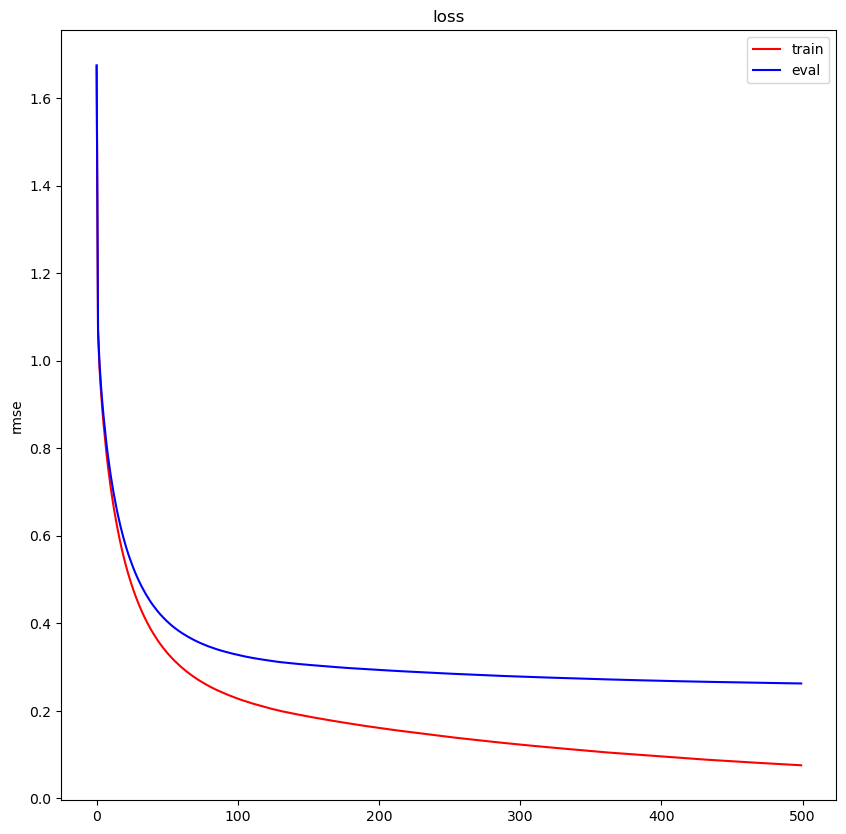

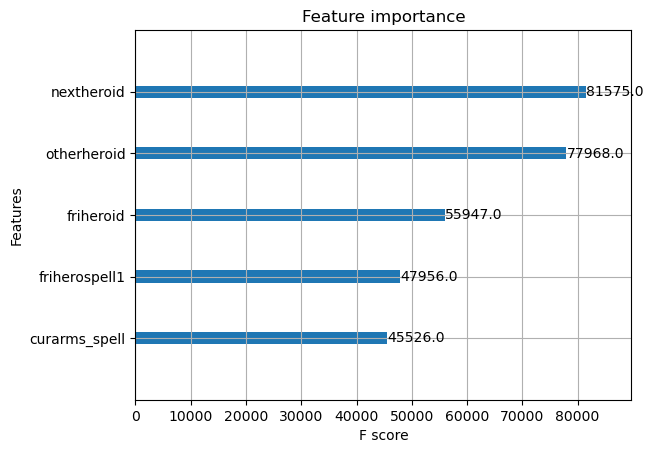

In [ ]:
def print_precison_recall_f1(y_true, y_pre):
    """打印精准率、召回率和F1值"""
    print("打印精准率、召回率和F1值")
    print(classification_report(y_true, y_pre))
    f1 = round(f1_score(y_true, y_pre, average='macro'), 2)
    p = round(precision_score(y_true, y_pre, average='macro'), 2)
    r = round(recall_score(y_true, y_pre, average='macro'), 2)
    print("Precision: {}, Recall: {}, F1: {} ".format(p, r, f1))

def train_model_2(xtrain, ytrain, xtest, ytest, xval, yval):
    params ={
      'max_depth': 8,                # 构建树的深度，越大越容易过拟合
      'objective': 'multi:softprob', # 多分类的问题 【multi:softmax 直接输出类别】【 multi:softprob：各个类别的概率】
      'eval_metric': 'mlogloss',
      'num_class':len(target_action_space),                 # 类别数，与 multisoftmax 并用
      'eta':0.05,                  #为了防止过拟合，更新过程中用到的收缩步长。eta通过缩减特征 的权重使提升计算过程更加保守。缺省值为0.3，取值范围为：[0,1]
      'subsample': 0.9,
      'colsample_bytree': 0.9,  # 建立树时对特征随机采样的比例（作用于特征）典型值：0.5-1
      'seed': 2023,
       'reg_alpha':0.3,
      'reg_lambda':0.3,
      'min_child_weight': 3,
      'tree_method':'gpu_hist'
    }

    xgtrain = xgb.DMatrix(xtrain.values, ytrain.values, feature_names=target_cols)
    xgtest = xgb.DMatrix(xtest.values, ytest.values, feature_names=target_cols)
    xgval = xgb.DMatrix(xval.values, feature_names=target_cols)

    watchlist  = [(xgtest,'eval'), (xgtrain,'train')]
    # res = xgb.cv(params, xgtrain, num_boost_round=1000, metrics=['merror','mlogloss'], early_stopping_rounds=5)
    # #找到最佳迭代轮数
    best_nround = 500
    evals_result = {}
    model = xgb.train(params, xgtrain, best_nround,  early_stopping_rounds = 50, evals = watchlist, evals_result = evals_result)
    model.set_attr(num_class = str(len(target_action_space)))
    model.set_attr(feature_names = str(len(target_cols)))

    model.save_model(model_save_name)
    y_pred=model.predict(xgval).argmax(axis=1)
    accuracy = accuracy_score(yval, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), f"best_nround: {best_nround}")
    print_precison_recall_f1(yval, y_pred)
    train_loss=list(evals_result['train'].values())[0]
    valid_loss=list(evals_result['eval'].values())[0]
    x_scale=[i for i in range(len(train_loss))]
    plt.figure(figsize=(10,10))
    plt.title('loss')
    plt.plot(x_scale,train_loss,label='train',color='r')
    plt.plot(x_scale,valid_loss,label='eval',color='b')
    plt.ylabel('rmse')
    plt.legend()
    plt.show()

    # 显示重要特征
    plot_importance(model, max_num_features=5)
    plt.show()

# fitting_process = Process(target = train_model_2, args=(x_train, y_train, x_test,  y_test, x_val, y_val))
# fitting_process.start()
# fitting_process.join()

train_model_2(x_train, y_train, x_test,  y_test, x_val, y_val)